<a href="https://colab.research.google.com/github/Sepren/Data-Analyst-ITMO/blob/main/lab1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Иерархический кластерный анализ

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('bmh')
%matplotlib inline

In [ ]:
df = pd.read_csv("Econom_Cities_data.csv", sep=';', index_col='City')
df

,Work,Price,Salary
City,,,
Amsterdam,1714,"65,6",49
Athens,1792,"53,8","30,4"
Bogota,2152,"37,9","11,5"
Bombay,2052,"30,3","5,3"
Brussels,1708,"73,8","50,5"
Buenos_Aires,1971,"56,1","12,5"
Cairo,-9999,"37,1",-9999
Caracas,2041,61,"10,9"
Chicago,1924,"73,9","61,9"


In [ ]:
df = df.drop(df[df['Work'] == -9999].index)
df

,Work,Price,Salary
City,,,
Amsterdam,1714,"65,6",49
Athens,1792,"53,8","30,4"
Bogota,2152,"37,9","11,5"
Bombay,2052,"30,3","5,3"
Brussels,1708,"73,8","50,5"
Buenos_Aires,1971,"56,1","12,5"
Caracas,2041,61,"10,9"
Chicago,1924,"73,9","61,9"
Copenhagen,1717,"91,3","62,9"


In [ ]:
df['Price'] = df['Price'].str.replace(',', '.')
df['Price'] = df['Price'].astype('float64')
df['Salary'] = df['Salary'].str.replace(',', '.')
df['Salary'] = df['Salary'].astype('float64')

In [ ]:
from sklearn import preprocessing

# Выбираем один из вариантов стандартизации
stand_1 = preprocessing.MinMaxScaler()
print(stand_1)
# вычисляем параметры стандартизации (они сохраняются внутри объекта norm)
stand_1.fit(df)
print(stand_1.fit(df))
# преобразуем данные
X = stand_1.transform(df)
print(X)
# Получаем объект X -- матрицу класса numpy.ndarray.
# Преобразуем её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index=df.index, columns=df.columns)

MinMaxScaler()
MinMaxScaler()
[[0.16540404 0.41431925 0.47584789]
 [0.26388889 0.2758216  0.28468654]
 [0.71843434 0.08920188 0.09044193]
 [0.59217172 0.         0.02672148]
 [0.15782828 0.51056338 0.49126413]
 [0.48989899 0.3028169  0.10071942]
 [0.57828283 0.36032864 0.08427544]
 [0.43055556 0.51173709 0.60842754]
 [0.16919192 0.71596244 0.61870504]
 [0.22222222 0.53638498 0.39773895]
 [0.13888889 0.5657277  0.59095581]
 [0.08459596 0.51877934 0.59301131]
 [0.375      0.76995305 0.90030832]
 [0.10606061 0.97769953 0.65673176]
 [1.         0.39319249 0.25796506]
 [0.49873737 0.48826291 0.44809866]
 [0.45707071 0.24413146 0.21891059]
 [0.73737374 0.15492958 0.07399794]
 [0.25631313 0.17488263 0.        ]
 [0.20075758 0.30399061 0.16546763]
 [0.19444444 0.63262911 0.44707091]
 [0.61237374 0.58098592 0.64234327]
 [0.23358586 0.47887324 0.70298047]
 [0.16035354 0.74530516 0.48612539]
 [0.86489899 0.11384977 0.01336074]
 [0.45580808 0.22887324 0.03083248]
 [0.23989899 0.60680751 0.52004111

In [ ]:
X

,Work,Price,Salary
City,,,
Amsterdam,0.165404,0.414319,0.475848
Athens,0.263889,0.275822,0.284687
Bogota,0.718434,0.089202,0.090442
Bombay,0.592172,0.000000,0.026721
Brussels,0.157828,0.510563,0.491264
Buenos_Aires,0.489899,0.302817,0.100719
Caracas,0.578283,0.360329,0.084275
Chicago,0.430556,0.511737,0.608428
Copenhagen,0.169192,0.715962,0.618705


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
link = linkage(df, 'ward', 'euclidean')

In [ ]:
link

array([[6.00000000e+00, 3.70000000e+01, 6.29285309e+00, 2.00000000e+00],
       [2.00000000e+01, 3.30000000e+01, 7.47328576e+00, 2.00000000e+00],
       [2.60000000e+01, 4.40000000e+01, 8.30662386e+00, 2.00000000e+00],
       [0.00000000e+00, 4.00000000e+00, 1.02708325e+01, 2.00000000e+00],
       [1.90000000e+01, 3.40000000e+01, 1.46935360e+01, 2.00000000e+00],
       [2.50000000e+01, 2.80000000e+01, 1.48003378e+01, 2.00000000e+00],
       [8.00000000e+00, 2.30000000e+01, 1.48882504e+01, 2.00000000e+00],
       [1.20000000e+01, 4.50000000e+01, 1.59655880e+01, 2.00000000e+00],
       [2.00000000e+00, 1.70000000e+01, 1.60909913e+01, 2.00000000e+00],
       [1.10000000e+01, 3.90000000e+01, 2.01638290e+01, 2.00000000e+00],
       [3.00000000e+01, 3.60000000e+01, 2.04088216e+01, 2.00000000e+00],
       [7.00000000e+00, 2.90000000e+01, 2.06777658e+01, 2.00000000e+00],
       [1.60000000e+01, 5.10000000e+01, 2.25906323e+01, 3.00000000e+00],
       [9.00000000e+00, 4.70000000e+01, 2.34231367e

In [ ]:
print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(45, 4)


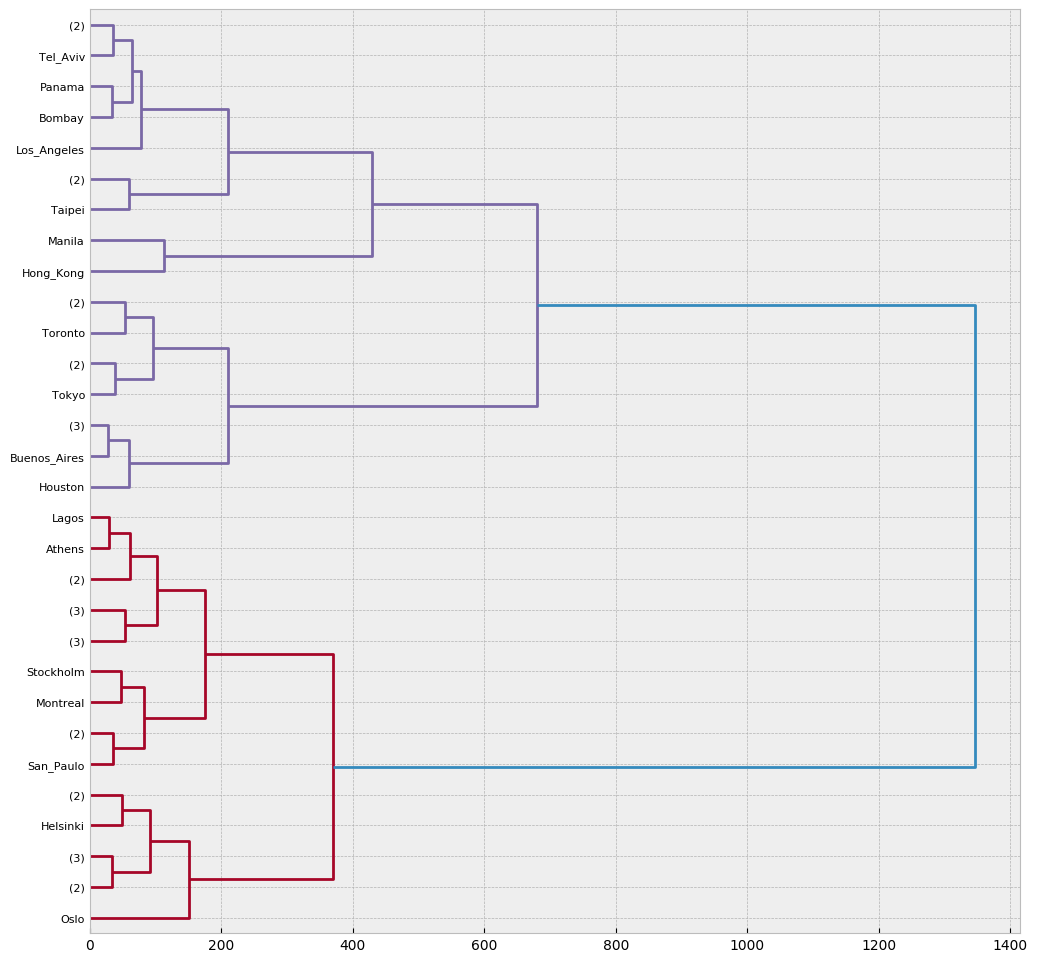

In [ ]:
#некорректный вид
fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                truncate_mode='lastp',
                labels=X.index.tolist(),
                leaf_font_size = 8,
                orientation='right')

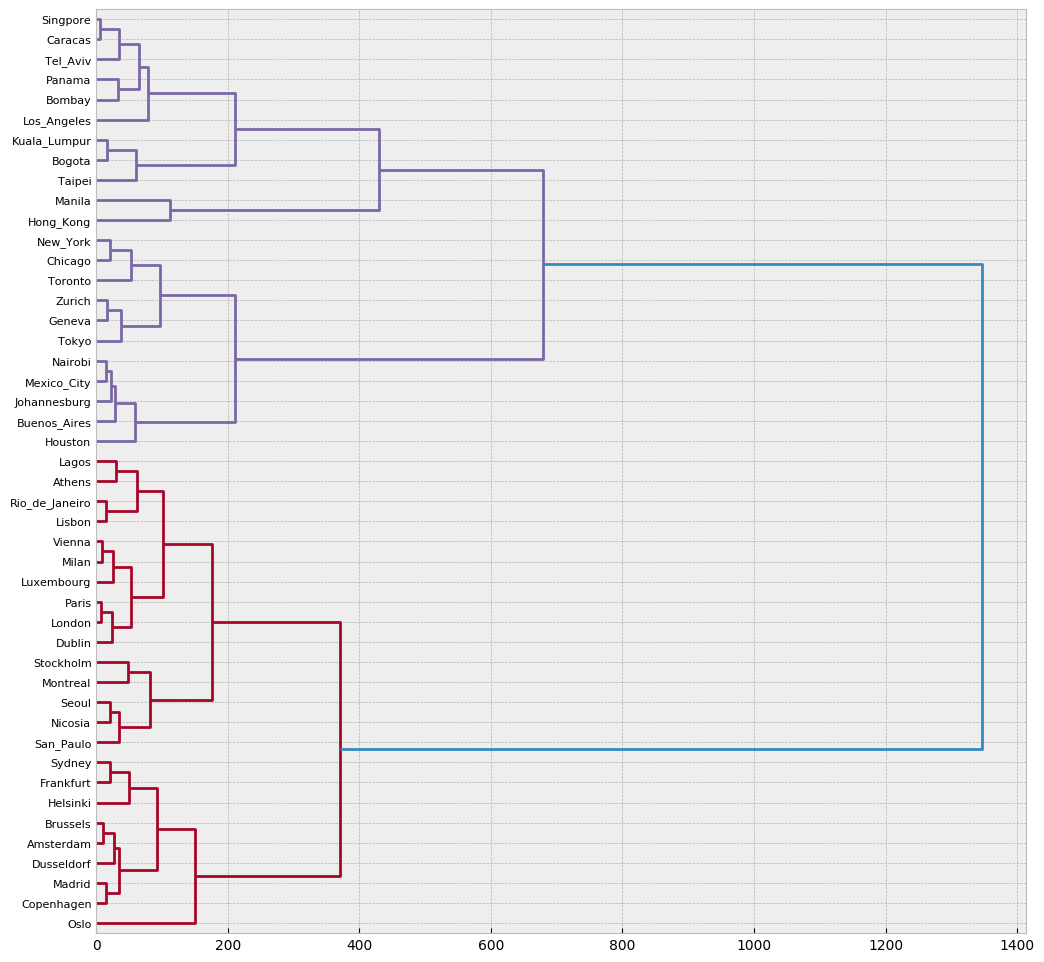

In [ ]:
fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                leaf_font_size = 8,
                orientation='right')

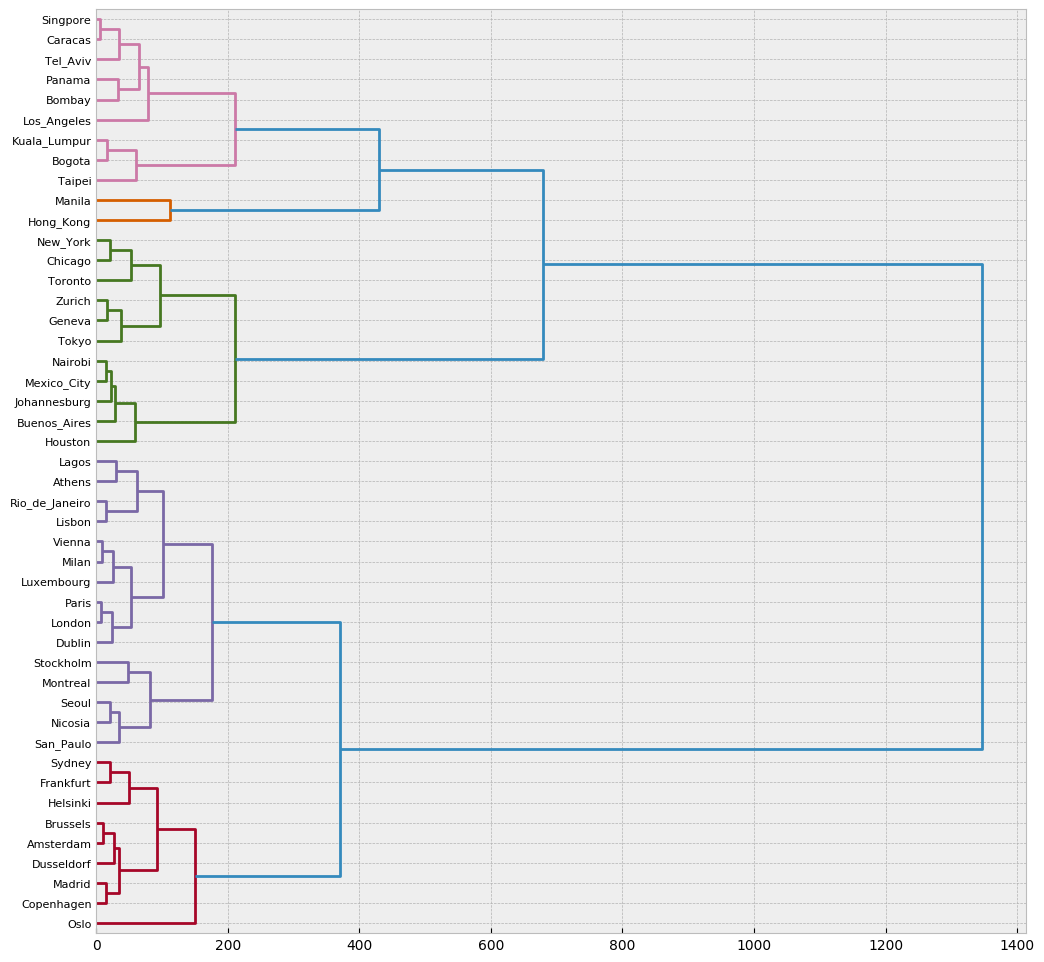

In [ ]:
fig = plt.figure(figsize=(12,12))

dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # повернуть подписи вертикально
                color_threshold=230,
                orientation = "right",
                )

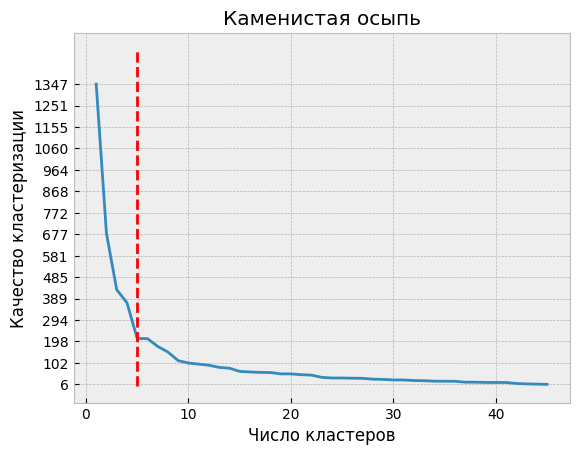

In [ ]:
_link = link[:, 2]
_link_rev = _link[::-1]
idx = range(1, len(_link) + 1)
plt.plot(idx, _link_rev)
plt.yticks(np.linspace(_link_rev.min(), _link_rev.max(), len(_link_rev) // 3))
plt.plot(np.full(2, 5), np.linspace(0, 1500, 2), 'r--')
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь')

plt.show()

In [ ]:
X['cluster'] = fcluster(link, 230, criterion='distance')

In [ ]:
X.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,0.121072,0.658190,0.560808
2,0.255892,0.437402,0.341692
3,0.432163,0.510990,0.475381
4,0.932449,0.253521,0.135663
5,0.633137,0.319510,0.194016


In [ ]:
X[X['cluster']==1].index.values

array(['Amsterdam', 'Brussels', 'Copenhagen', 'Dusseldorf', 'Frankfurt',
       'Helsinki', 'Madrid', 'Oslo', 'Sydney'], dtype=object)

In [ ]:
X['cluster'].sort_values()

,cluster
City,
Amsterdam,1
Madrid,1
Helsinki,1
Frankfurt,1
Dusseldorf,1
Copenhagen,1
Oslo,1
Brussels,1
Sydney,1


#K-means

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline
# matplotlib.style.use('_classic_test_patch')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
new_df = pd.read_csv('Econom_Cities_data.csv', sep=';', index_col='City')
new_df

,Work,Price,Salary
City,,,
Amsterdam,1714,"65,6",49
Athens,1792,"53,8","30,4"
Bogota,2152,"37,9","11,5"
Bombay,2052,"30,3","5,3"
Brussels,1708,"73,8","50,5"
Buenos_Aires,1971,"56,1","12,5"
Cairo,-9999,"37,1",-9999
Caracas,2041,61,"10,9"
Chicago,1924,"73,9","61,9"


In [ ]:
new_df = new_df.drop(new_df[new_df['Work'] == -9999].index)
new_df

,Work,Price,Salary
City,,,
Amsterdam,1714,"65,6",49
Athens,1792,"53,8","30,4"
Bogota,2152,"37,9","11,5"
Bombay,2052,"30,3","5,3"
Brussels,1708,"73,8","50,5"
Buenos_Aires,1971,"56,1","12,5"
Caracas,2041,61,"10,9"
Chicago,1924,"73,9","61,9"
Copenhagen,1717,"91,3","62,9"


In [ ]:
new_df['Price'] = new_df['Price'].str.replace(',', '.')
new_df['Price'] = new_df['Price'].astype('float64')
new_df['Salary'] = new_df['Salary'].str.replace(',', '.')
new_df['Salary'] = new_df['Salary'].astype('float64')

In [ ]:
from sklearn import preprocessing

# Выбираем один из вариантов стандартизации
stand_2 = preprocessing.MinMaxScaler()
print(stand_2)
# вычисляем параметры стандартизации (они сохраняются внутри объекта norm)
stand_2.fit(new_df)
print(stand_2.fit(new_df))
# преобразуем данные
Y = stand_2.transform(new_df)
print(Y)
# Получаем объект Y -- матрицу класса numpy.ndarray.
# Преобразуем её в объект класса pandas.DataFrame.
Y = pd.DataFrame(Y, index=new_df.index, columns=new_df.columns)

MinMaxScaler()
MinMaxScaler()
[[0.16540404 0.41431925 0.47584789]
 [0.26388889 0.2758216  0.28468654]
 [0.71843434 0.08920188 0.09044193]
 [0.59217172 0.         0.02672148]
 [0.15782828 0.51056338 0.49126413]
 [0.48989899 0.3028169  0.10071942]
 [0.57828283 0.36032864 0.08427544]
 [0.43055556 0.51173709 0.60842754]
 [0.16919192 0.71596244 0.61870504]
 [0.22222222 0.53638498 0.39773895]
 [0.13888889 0.5657277  0.59095581]
 [0.08459596 0.51877934 0.59301131]
 [0.375      0.76995305 0.90030832]
 [0.10606061 0.97769953 0.65673176]
 [1.         0.39319249 0.25796506]
 [0.49873737 0.48826291 0.44809866]
 [0.45707071 0.24413146 0.21891059]
 [0.73737374 0.15492958 0.07399794]
 [0.25631313 0.17488263 0.        ]
 [0.20075758 0.30399061 0.16546763]
 [0.19444444 0.63262911 0.44707091]
 [0.61237374 0.58098592 0.64234327]
 [0.23358586 0.47887324 0.70298047]
 [0.16035354 0.74530516 0.48612539]
 [0.86489899 0.11384977 0.01336074]
 [0.45580808 0.22887324 0.03083248]
 [0.23989899 0.60680751 0.52004111

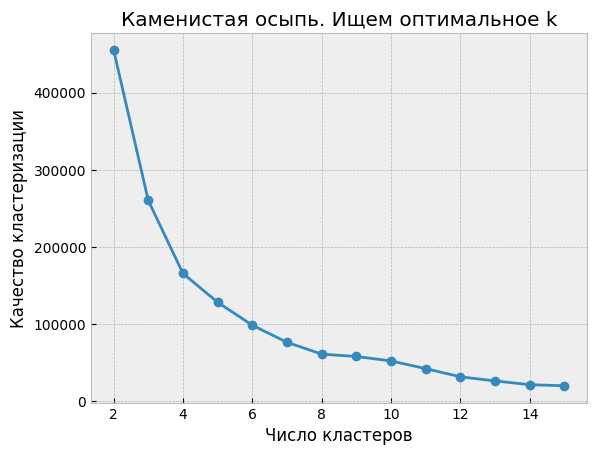

In [ ]:
K = range(2, 16)
models = [KMeans(n_clusters=k, random_state=42).fit(new_df) for k in K]
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь. Ищем оптимальное k')

plt.show()

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(new_df)
new_df['cluster'] = model.labels_

In [ ]:
new_df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,2221.400000,53.900000,17.540000
1,1826.428571,75.021429,49.492857
2,1996.769231,60.238462,27.715385
3,1702.928571,80.121429,48.442857


In [ ]:
new_df[new_df['cluster']==3].index.values

array(['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'Dusseldorf',
       'Frankfurt', 'Helsinki', 'Lisbon', 'London', 'Madrid', 'Oslo',
       'Paris', 'Rio_de_Janeiro', 'Sydney'], dtype=object)

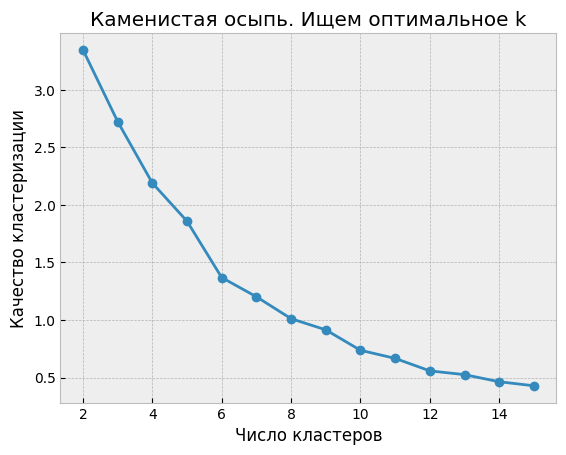

In [ ]:
K = range(2, 16)
models = [KMeans(n_clusters=k, random_state=42).fit(Y) for k in K]
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь. Ищем оптимальное k')

plt.show()

In [ ]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(Y)
Y['cluster'] = model.labels_

In [ ]:
Y.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,0.756313,0.162167,0.096095
1,0.407107,0.607143,0.724710
2,0.184635,0.567804,0.509447
3,0.344008,0.240397,0.142764
4,0.582323,0.463380,0.249332
5,0.190341,0.980634,0.582477


In [ ]:
Y[Y['cluster']==2].index.values

array(['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'Dusseldorf',
       'Frankfurt', 'London', 'Madrid', 'Milan', 'Montreal', 'Paris',
       'Sydney', 'Vienna'], dtype=object)

#DBSCAN

In [ ]:
# #  Активируем библиотеки

# import numpy as np
# import pandas as pd

# import matplotlib
# import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
# %matplotlib inline

# import os

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
n_df = pd.read_csv('Econom_Cities_data.csv', sep=';', index_col='City')
n_df

,Work,Price,Salary
City,,,
Amsterdam,1714,"65,6",49
Athens,1792,"53,8","30,4"
Bogota,2152,"37,9","11,5"
Bombay,2052,"30,3","5,3"
Brussels,1708,"73,8","50,5"
Buenos_Aires,1971,"56,1","12,5"
Cairo,-9999,"37,1",-9999
Caracas,2041,61,"10,9"
Chicago,1924,"73,9","61,9"


In [ ]:
n_df = n_df.drop(n_df[n_df['Work'] == -9999].index)
n_df

,Work,Price,Salary
City,,,
Amsterdam,1714,"65,6",49
Athens,1792,"53,8","30,4"
Bogota,2152,"37,9","11,5"
Bombay,2052,"30,3","5,3"
Brussels,1708,"73,8","50,5"
Buenos_Aires,1971,"56,1","12,5"
Caracas,2041,61,"10,9"
Chicago,1924,"73,9","61,9"
Copenhagen,1717,"91,3","62,9"


In [ ]:
n_df['Price'] = n_df['Price'].str.replace(',', '.')
n_df['Price'] = n_df['Price'].astype('float64')
n_df['Salary'] = n_df['Salary'].str.replace(',', '.')
n_df['Salary'] = n_df['Salary'].astype('float64')

In [ ]:
from sklearn import preprocessing

# Выбираем один из вариантов стандартизации
stand_3 = preprocessing.MinMaxScaler()
print(stand_3)
# вычисляем параметры стандартизации (они сохраняются внутри объекта norm)
stand_3.fit(new_df)
print(stand_3.fit(new_df))
# преобразуем данные
Z = stand_3.transform(new_df)
print(Z)
# Получаем объект Z -- матрицу класса numpy.ndarray.
# Преобразуем её в объект класса pandas.DataFrame.
Z = pd.DataFrame(Z, index=new_df.index, columns=new_df.columns)
print(Z)

MinMaxScaler()
MinMaxScaler()
[[0.16540404 0.41431925 0.47584789 1.        ]
 [0.26388889 0.2758216  0.28468654 0.33333333]
 [0.71843434 0.08920188 0.09044193 0.        ]
 [0.59217172 0.         0.02672148 0.66666667]
 [0.15782828 0.51056338 0.49126413 1.        ]
 [0.48989899 0.3028169  0.10071942 0.66666667]
 [0.57828283 0.36032864 0.08427544 0.66666667]
 [0.43055556 0.51173709 0.60842754 0.66666667]
 [0.16919192 0.71596244 0.61870504 1.        ]
 [0.22222222 0.53638498 0.39773895 1.        ]
 [0.13888889 0.5657277  0.59095581 1.        ]
 [0.08459596 0.51877934 0.59301131 1.        ]
 [0.375      0.76995305 0.90030832 0.33333333]
 [0.10606061 0.97769953 0.65673176 1.        ]
 [1.         0.39319249 0.25796506 0.        ]
 [0.49873737 0.48826291 0.44809866 0.66666667]
 [0.45707071 0.24413146 0.21891059 0.66666667]
 [0.73737374 0.15492958 0.07399794 0.        ]
 [0.25631313 0.17488263 0.         0.33333333]
 [0.20075758 0.30399061 0.16546763 1.        ]
 [0.19444444 0.63262911 0.4470

In [ ]:
dbscan_1 = DBSCAN(eps=0.3, metric='euclidean', min_samples=2)

dbscan_1.fit(Z)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  4]
 [ 0 12]
 [ 1 10]
 [ 2  3]
 [ 3 13]
 [ 4  2]
 [ 5  2]]


In [ ]:
n_df['dbscan'] = dbscan_1.labels_


n_df['dbscan'].sort_values()

,dbscan
City,
Tokyo,-1
Taipei,-1
Hong_Kong,-1
Stockholm,-1
Amsterdam,0
Oslo,0
Paris,0
Helsinki,0
Frankfurt,0


In [ ]:
from sklearn import metrics

In [ ]:
eps_1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
min_samples_1 = [1, 2, 3, 4,5, 6]
sil_avg = []
max_value = [0, 0, 0, -1]

In [ ]:
for i in range(len(eps_1)):
    for j in range(len(min_samples_1)):

        db = DBSCAN(min_samples = min_samples_1[j], eps =eps_1[i]).fit(X)

        labels = db.labels_

        # Число кластеров, после отбрасывания выбросов.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        # Число выбросов.
        # n_noise_ = list(labels).count(-1)

        if n_clusters_ > 1:
            silhouette_avg = metrics.silhouette_score(df, labels)
            if silhouette_avg > max_value[3]:
                max_value=(eps_1[i], min_samples_1[j], n_clusters_, silhouette_avg)
            sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.4 
min_sample= 1 
number of clusters= 5 
average silhouette score= 0.4278


In [ ]:
dbscan_2 = DBSCAN(eps=0.4, metric='euclidean', min_samples=1)

dbscan_2.fit(Z)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 12]
 [ 1  5]
 [ 2  3]
 [ 3  9]
 [ 4  4]
 [ 5  2]
 [ 6  2]
 [ 7  2]
 [ 8  5]
 [ 9  2]]


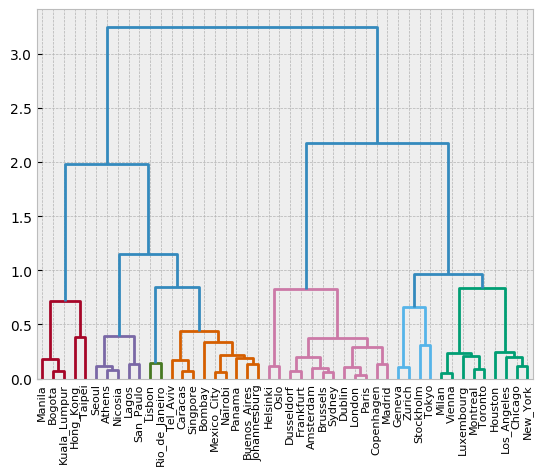

In [ ]:
link = linkage(Z, 'ward', 'euclidean')
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=Z.index.tolist(),
                # повернуть подписи вертикально
                color_threshold=0.84)

In [ ]:
Z['dbscan_1'] = dbscan_1.labels_
Z['cluster'] = fcluster(link, 0.84, criterion='maxclust')

In [ ]:
Z['cluster'] = fcluster(link, 0.84, criterion='distance')

In [ ]:
Z.groupby('cluster').mean()

,Work,Price,Salary,dbscan_1
cluster,,,,
1,0.806061,0.276995,0.152518,0.800000
2,0.299495,0.240845,0.188489,1.000000
3,0.205177,0.245892,0.122816,5.000000
4,0.532969,0.262780,0.110540,3.000000
5,0.142466,0.641236,0.528006,0.000000
6,0.347538,0.883216,0.736639,1.500000
7,0.378928,0.534950,0.576796,1.888889


In [ ]:
Z[Z['cluster']==1].index.values

array(['Bogota', 'Hong_Kong', 'Kuala_Lumpur', 'Manila', 'Taipei'],
      dtype=object)